In [2]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [7]:
x = x.drop(['Geography', 'Gender'], axis=1, errors='ignore')
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
x =pd.concat([x, geography, gender], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [12]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [13]:
x_train.shape

(8000, 11)

In [14]:
x_test.shape

(2000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [18]:
classifier = Sequential()

classifier.add(Dense(units = 11, activation='relu'))

classifier.add(Dense(units = 7, activation='relu'))

classifier.add(Dense(units = 6, activation='relu'))

classifier.add(Dense(units = 1, activation='sigmoid'))

In [19]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=[early_stopping])

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8698 - val_loss: 0.3666 - val_accuracy: 0.8527
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3077 - accuracy: 0.8692 - val_loss: 0.3640 - val_accuracy: 0.8535
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.8711 - val_loss: 0.3621 - val_accuracy: 0.8516
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.8726 - val_loss: 0.3616 - val_accuracy: 0.8531
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3060 - accuracy: 0.8711 - val_loss: 0.3620 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.8705 - val_loss: 0.3621 - val_accuracy: 0.8538
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.8707 - val_loss: 0.3653 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

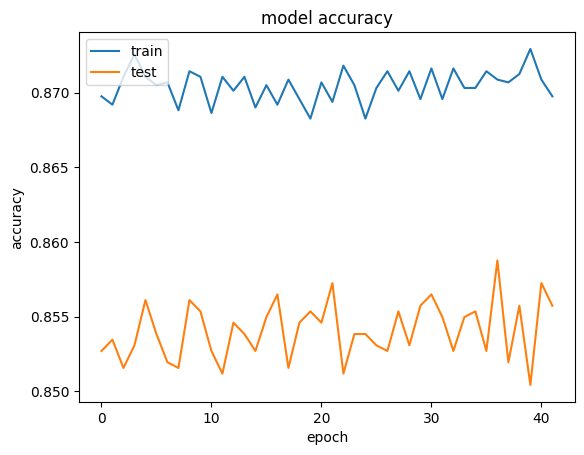

In [27]:
plt.plot(model_history.history['accuracy']) 
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

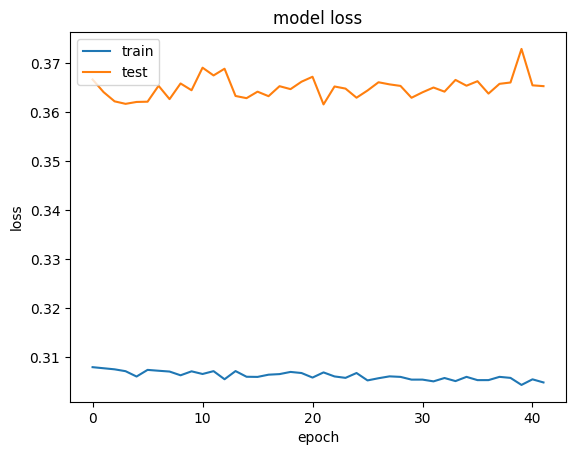

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1472,  123],
       [ 186,  219]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8455

In [33]:
classifier.get_weights()

[array([[-0.173506  , -0.01282009, -0.28080058, -0.08460982,  0.47046024,
          0.20760675,  0.15224001, -0.09073968,  0.1626328 ,  0.04361372,
         -0.14094281],
        [-0.528414  ,  1.063664  , -0.37923095, -0.0233904 ,  0.37427908,
          0.40889055, -0.25833836,  0.94223493, -0.70336396, -0.3168949 ,
          1.4522952 ],
        [ 0.14051434, -0.06208039, -0.14069025,  0.20373197,  0.01178558,
          0.1888339 ,  0.03860195,  0.01443167,  0.31183597, -0.01537246,
         -0.02245255],
        [ 0.1063423 , -0.41351092, -0.28709352, -1.1328261 , -0.40206957,
          0.19197029, -0.18202268,  0.63711375, -1.0750743 , -0.1366768 ,
         -0.26582146],
        [-0.24484068, -0.31073308,  0.6699317 , -1.2186334 ,  0.5914499 ,
          0.9631049 , -0.1461219 ,  0.00366243,  0.01231575,  1.1952395 ,
          0.35422578],
        [-0.39176846, -0.19822605, -0.3839407 , -0.08820704, -0.8272915 ,
          0.97507644,  0.5833602 , -0.13616821, -0.22343789, -0.2317351